In [3]:
from samana.forward_model import forward_model
from samana.Data.wgdj0405 import WGDJ0405_JWST, WGDJ0405_HST
from samana.Model.wgdj0405_model import WGDJ0405ModelEPLM3M4Shear
import os
import numpy as np
import pickle

### Modeling of the lens system WGDJ 0405 with JWST flux ratio measurements presented by Nierenberg et al. (2023) and HST imaging data of the lensed arcs in 814W

In [5]:
data_class = WGDJ0405_JWST()
model = WGDJ0405ModelEPLM3M4Shear
preset_model_name = 'WDM'
kwargs_sample_realization = {'log10_sigma_sub': ['UNIFORM', -1.5, -1.49], 
                            'log_mc': ['UNIFORM', 4.0, 4.1]}

kwargs_sample_source = {'source_size_pc': ['UNIFORM', 1, 10]}
kwargs_sample_macro_fixed = {
    'a4_a': ['GAUSSIAN', 0.0, 0.01], 
    'a3_a': ['GAUSSIAN', 0.0, 0.005],
    'delta_phi_m3': ['GAUSSIAN', -np.pi/6, np.pi/6]
}

output_path = os.getcwd() + '/example_model_0405/'
job_index = 1
n_keep = 10
tolerance = np.inf

reading output to files: 
/Users/danielgilman/Code/samana/notebooks/example_model_0405/job_1/parameters.txt
/Users/danielgilman/Code/samana/notebooks/example_model_0405/job_1/fluxes.txt
starting with 0 samples accepted, 10 remain
existing magnifications:  None
samples remaining:  10
running simulation with a summary statistic tolerance of:  inf
random seed:  39088227
SOURCE PARAMETERS: 
{'source_size_pc': 1.4714835144024303}
REALIZATION PARAMETERS: 
{'log10_sigma_sub': -1.494022762949503, 'log_mc': 4.0078764463475265}
FIXED MACROMODEL SAMPLES: 
{'a4_a': 0.004609065988538065, 'a3_a': 0.005315857615356072, 'delta_phi_m3': -0.14558365015974872}
realization has 2695 halos
setting up decoupled multi-plane approximation...
done.
running fitting sequence...
Computing the PSO ...
10
20
30
40
50
60
70
80
90
100
Max iteration reached! Stopping.
-1.203080829536616 reduced X^2 of best position
-2349.0153196702427 log likelihood
3905 effective number of data points
[{'theta_E': 0.7169566736850959, 

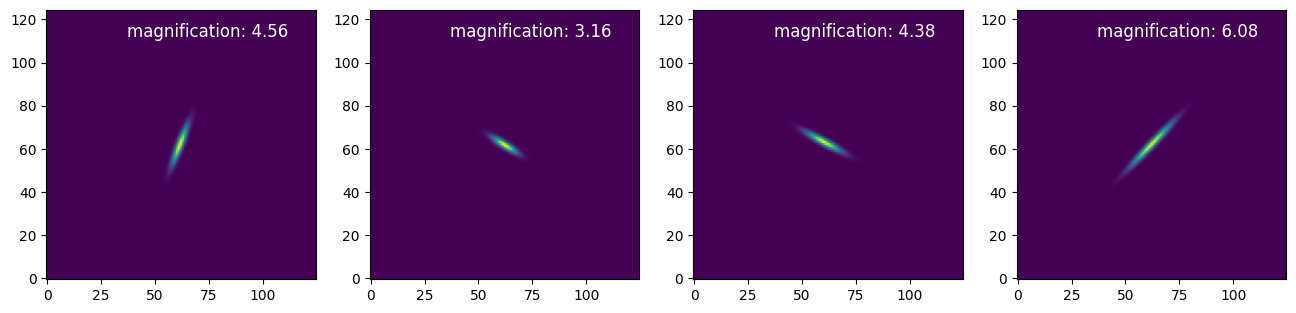

-1.1313636287258864 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.131363628725886


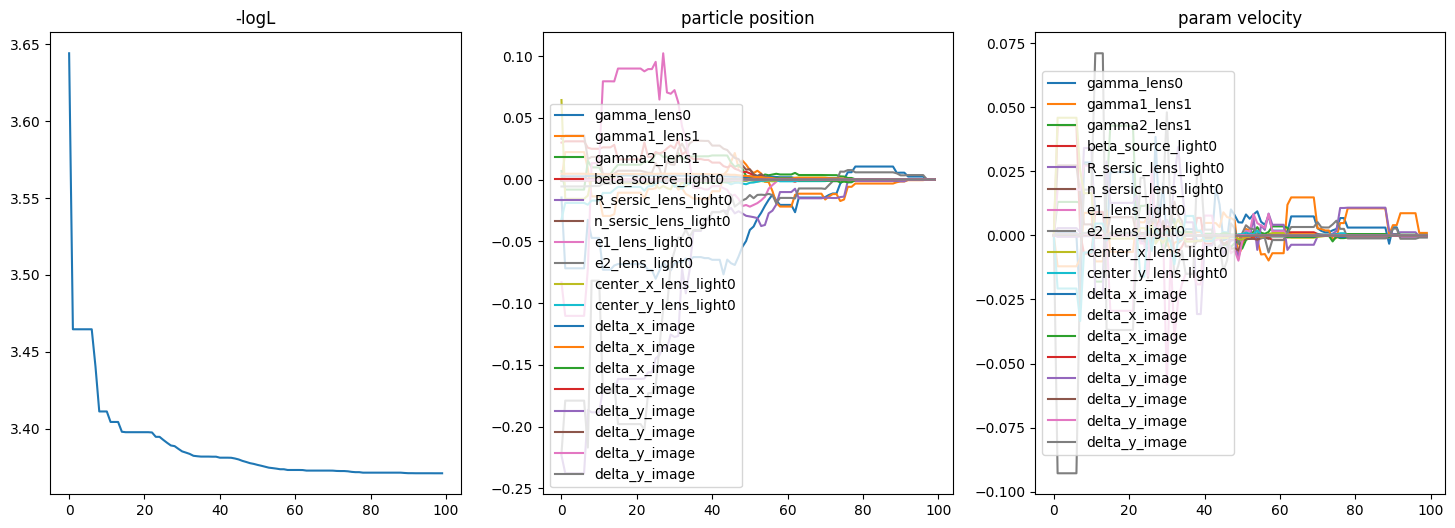

<Figure size 640x480 with 0 Axes>

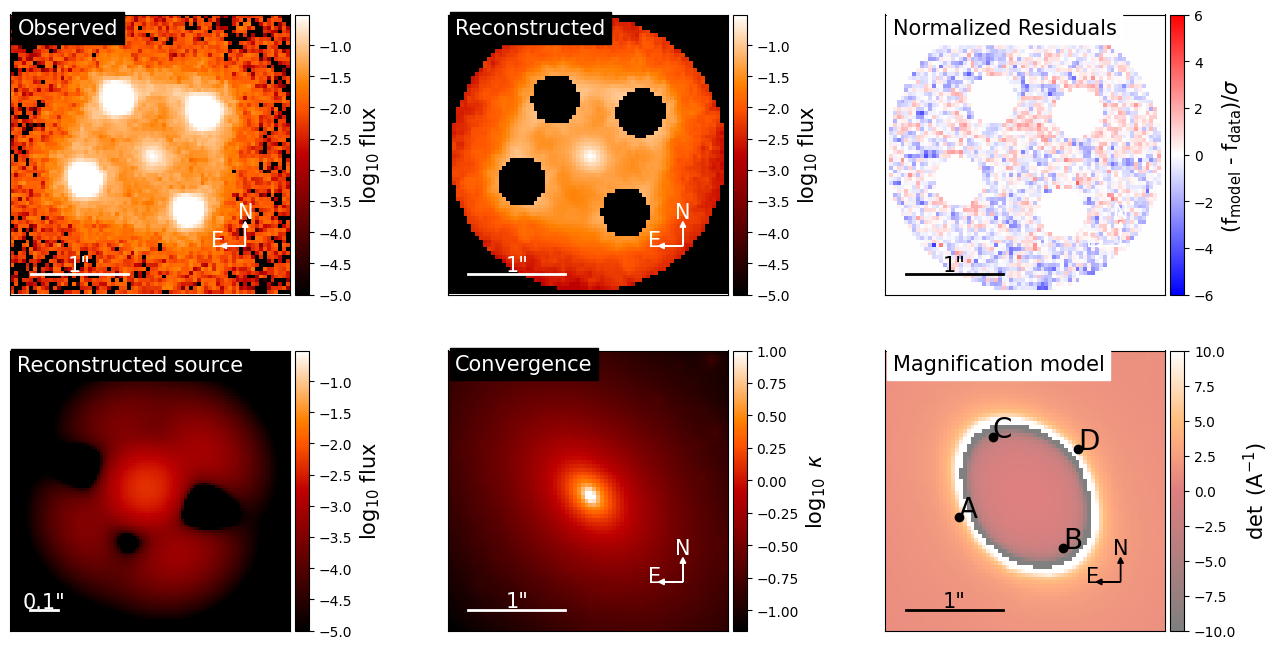

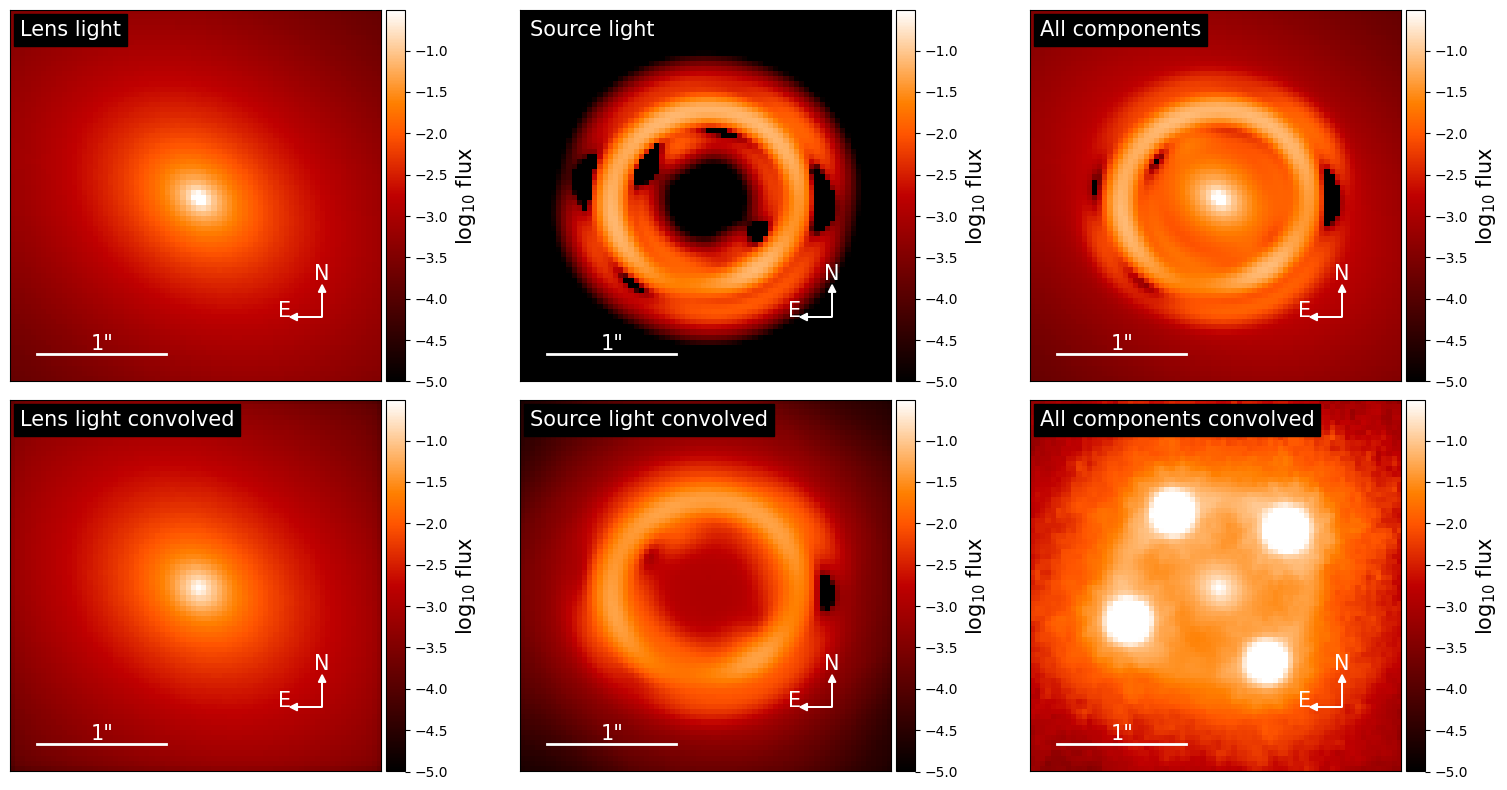

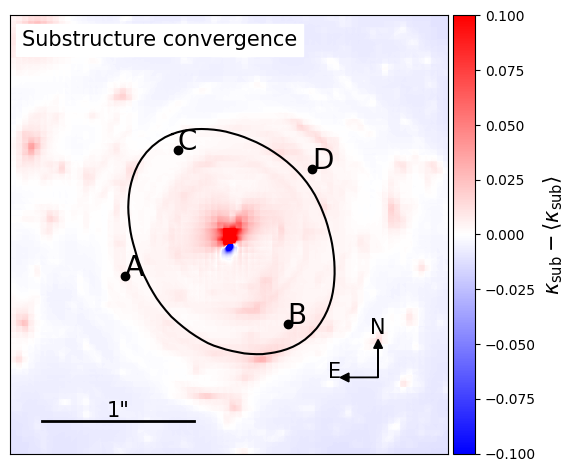


N_kept:  1
N remaining:  9
accepted realizations counter:  1
random seed:  39088228
SOURCE PARAMETERS: 
{'source_size_pc': 2.139686697386122}
REALIZATION PARAMETERS: 
{'log10_sigma_sub': -1.4921637230696916, 'log_mc': 4.090987962339521}
FIXED MACROMODEL SAMPLES: 
{'a4_a': 0.0005247906034796888, 'a3_a': -0.0024667727536781276, 'delta_phi_m3': 0.05609255611359365}


KeyboardInterrupt: 

In [6]:
job_index = 1
random_seed_init = None
n_pso_particles = 10
n_pso_iterations = 100
nmax_shapelets = 4
forward_model(output_path, job_index, n_keep, data_class, model, preset_model_name,
                  kwargs_sample_realization, kwargs_sample_source, kwargs_sample_macro_fixed, 
               tolerance, random_seed_init=random_seed_init, 
              verbose=True, n_pso_particles=n_pso_particles, 
              n_max_shapelets=nmax_shapelets,
              n_pso_iterations=n_pso_iterations, num_threads=8, 
              resample_kwargs_lens=False, use_imaging_data=True, test_mode=True)